In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
import matplotlib
from tqdm import tqdm
from numba import prange,njit
import math
import os
import pickle
plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
@njit
def dist_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaphi=abs(otherTsPhi[i] - refPhi)
        if deltaphi>math.pi: deltaphi=deltaphi-2*math.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + (deltaphi) ** 2) ** 0.5
        out.append(distance)
    return np.array(out)
@njit
def distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaPhi = otherTsPhi[i] - refPhi
        deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + deltaPhi ** 2) ** 0.5
        out.append(distance)
    return np.array(out)

@njit
def flatten_numba(a):
    return [x[0] if len(x) else 0 for x in a]



In [3]:
#filename='/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionPtError0PU/SinglePionTiming_1p9_100GeV/histo/histo_96692_0.root'
filename = "histo_200ev.root"
#path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/"
#files = os.listdir(path)[:10]
#print(files)
file = uproot.open(filename)

In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/clusters;16',
 'ticlDumper/clusters;15',
 'ticlDumper/trackstersCLUE3DHigh;7',
 'ticlDumper/trackstersCLUE3DHigh;6',
 'ticlDumper/trackstersTiclCandidate;7',
 'ticlDumper/trackstersTiclCandidate;6',
 'ticlDumper/tracks;3',
 'ticlDumper/tracks;2',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/superclustering;1',
 'ticlDumper/associations;1',
 'ticlDumper/simTICLCandidate;1']

In [5]:
file["ticlDumper/simtrackstersCP"].keys()


['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [6]:
file["ticlDumper/tracks"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_xErr',
 'track_hgcal_yErr',
 'track_hgcal_xyCov',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_etaErr',
 'track_hgcal_phiErr',
 'track_hgcal_etaphiCov',
 'track_hgcal_pt',
 'track_pt',
 'track_missing_outer_hits',
 'track_missing_inner_hits',
 'track_quality',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_beta',
 'track_time_mtd',
 'track_time_mtd_err',
 'track_pos_mtd',
 'track_pos_mtd/track_pos_mtd.theVector.theX',
 'track_pos_mtd/track_pos_mtd.theVector.theY',
 'track_pos_mtd/track_pos_mtd.theVector.theZ',
 'track_nhits',
 'track_isMuon',
 'track_isTrackerMuon']

In [7]:
file["ticlDumper/trackstersTiclCandidate"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [8]:
file["ticlDumper/trackstersCLUE3DHigh"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [9]:
CUT=0.8

In [22]:
file=uproot.open(filename)

In [153]:
#ON ALL EVENTS


dict_info={"R" : [],
           "eta_trk" : [],
           "phi_trk" : [],
           "pt_trk" : [],
           "deltaR_trk" : [],
           "etaErr" : [],
           "phiErr" : [],
           "etaphiCov" : [],
           "contamination" : [],
           "simEnergy" : []
          }

folders_1p9 = ["SinglePionTimingPU_1p9_100GeV", "SinglePionTimingPU_1p9_10GeV",
     "SinglePionTimingPU_1p9_15GeV", "SinglePionTimingPU_1p9_2GeV",
     "SinglePionTimingPU_1p9_30GeV", "SinglePionTimingPU_1p9_4GeV",
     "SinglePionTimingPU_1p9_50GeV", "SinglePionTimingPU_1p9_6GeV",
     "SinglePionTimingPU_1p9_8GeV"]
folders_2p2 = ["SinglePionTimingPU_2p2_100GeV", "SinglePionTimingPU_2p2_10GeV",
     "SinglePionTimingPU_2p2_15GeV", "SinglePionTimingPU_2p2_2GeV",
     "SinglePionTimingPU_2p2_30GeV", "SinglePionTimingPU_2p2_4GeV",
     "SinglePionTimingPU_2p2_50GeV", "SinglePionTimingPU_2p2_6GeV",
     "SinglePionTimingPU_2p2_8GeV"]
folderlist=["."]
print(folderlist)
files=["histo.root","histo_1.root","histo_2.root"]
for folder in folderlist:
    #path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/"+folder+"/histo/"
    #files = os.listdir(path)[:10]
    
    for f in files: 
        file=uproot.open(filename)
        try: #avoids some .root files with no information contained in them
            alltracksters = file['ticlDumper/trackstersCLUE3DHigh']
        except: 
            continue
        allsimtrackstersCP = file['ticlDumper/simtrackstersCP']
        alltracks = file["ticlDumper/tracks"]
        allassociations = file['ticlDumper/associations']
        tsCP=allsimtrackstersCP.arrays(["trackIdx","regressed_energy"])
        tracksters = alltracksters.arrays(["barycenter_phi","barycenter_eta","raw_energy"])
        associations = allassociations.arrays(['tsCLUE3D_recoToSim_CP_sharedE',"tsCLUE3D_recoToSim_CP"])
        trks=alltracks.arrays(["track_hgcal_eta","track_hgcal_phi","track_pt","track_id", 'track_hgcal_etaErr','track_hgcal_phiErr','track_hgcal_etaphiCov'])
        
        for ev in tqdm(range(len(tsCP))):
            assEv=associations[ev]
            for i in range(len(tsCP[ev]["trackIdx"])):
                if tsCP[ev]["trackIdx"][i]==-1: continue
                try:
                    trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
                except ValueError:
                    continue
                simEnergy=tsCP[ev]["regressed_energy"][i]
                refEta=trks[ev]["track_hgcal_eta"][trackIdx]
                refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
                #print(len(tracksters))
                tsEv = tracksters[ev]
                otherTsEta = tsEv["barycenter_eta"]
                otherTsPhi = tsEv["barycenter_phi"]
                #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
                #print(distance)
                distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
                #print(distance)
                
                idx_sort = np.array(distance).argsort()
                distance_sorted = distance[idx_sort]
                tsEnergy_sorted = tsEv.raw_energy[idx_sort]
                sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
                assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
                correctTrackMask=(assocIdxs_sorted==i)
                totalSharedE=np.sum(sharedEnergy_sorted[correctTrackMask])
                distScan=np.linspace(0,0.7,100)
                listE=[]
                listContamination=[]
                radius=-1
                #print(sharedEnergy_sorted[(correctTrackMask)])
                frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
                #contamination= 1.-np.cumsum(sharedEnergy_sorted[correctTrackMaskrackMask])
                firstAboveThrIdx = np.argmax(frac>CUT)
                radius=distance_sorted[firstAboveThrIdx]
                
                try:
                    contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
                except:
                    contamination=0
                if math.isnan(contamination):
                    contamination=0
                
                if radius!=-1:
                    dict_info["R"].append(radius)
                    dict_info["eta_trk"].append(abs(trks[ev]["track_hgcal_eta"][trackIdx]))
                    dict_info["phi_trk"].append(trks[ev]["track_hgcal_phi"][trackIdx])
                    dict_info["pt_trk"].append(trks[ev]["track_pt"][trackIdx])
                    dict_info["etaErr"].append(trks[ev]["track_hgcal_etaErr"][trackIdx]*1.5)
                    dict_info["phiErr"].append(trks[ev]["track_hgcal_phiErr"][trackIdx]*1.5)
                    dict_info["deltaR_trk"].append(math.sqrt((trks[ev]["track_hgcal_phiErr"][trackIdx]*1.5)**2+ (trks[ev]["track_hgcal_etaErr"][trackIdx]*1.5)**2))
                    dict_info["etaphiCov"].append(trks[ev]["track_hgcal_etaphiCov"][trackIdx]*1.5*1.5)
                    dict_info["contamination"].append(contamination*100)
                    dict_info["simEnergy"].append(simEnergy)
                    
            

with open('results.pkl', 'wb') as handle:
        pickle.dump(dict_info, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#plt.plot(distScan,listE,label="fraction of shared energy")
#plt.plot(distScan,listContamination,label="contamination fraction")
#plt.xlabel("$\Delta R$(track-trackster)")
#plt.legend()
#print(radius)


['.']


  0%|          | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_441/4235356335.py:85: RuntimeWarning: invalid value encountered in double_scalars
  contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
100%|██████████| 200/200 [00:03<00:00, 64.05it/s]


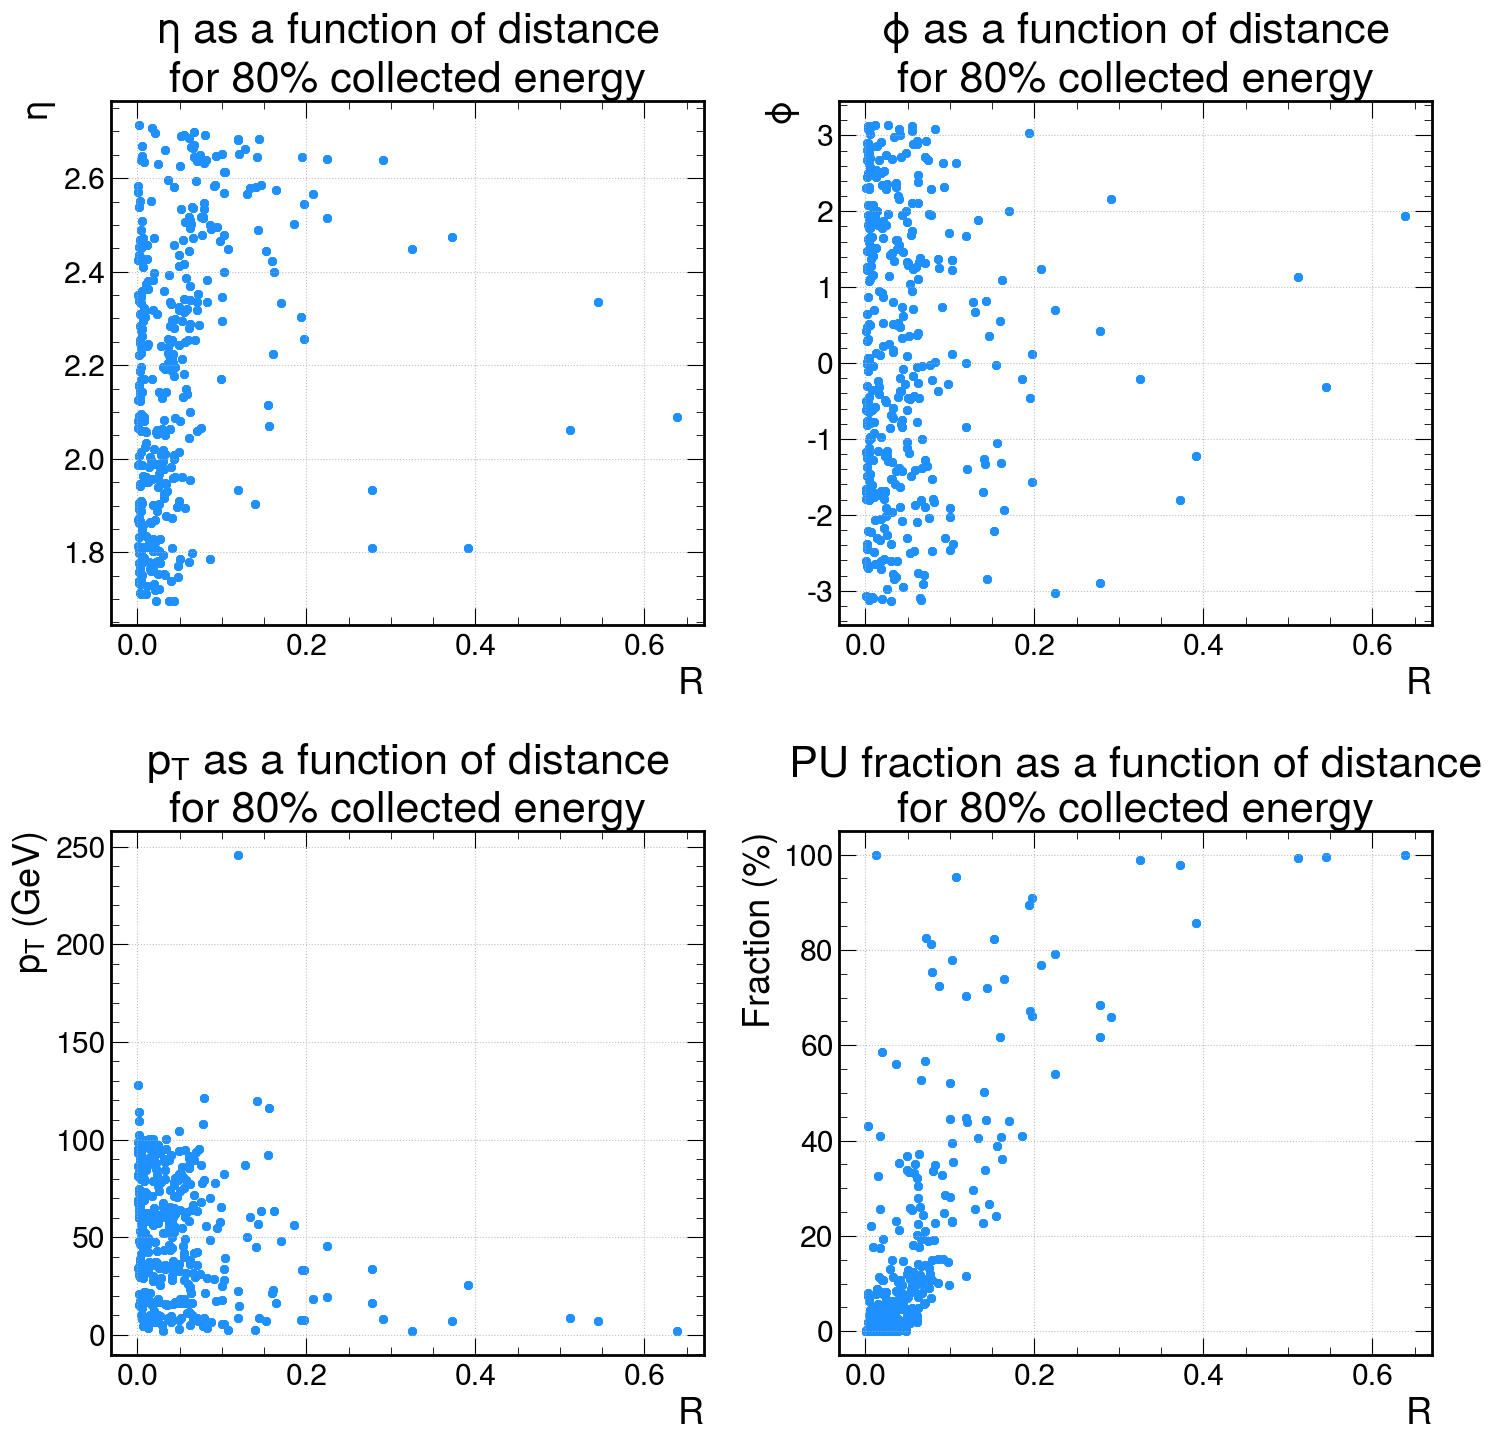

In [154]:

with open('results.pkl', 'rb') as file:
    dict_info=pickle.load(file)

#print(len(dict_info["R"]),len(dict_info["pt_trk"]),len(dict_info["phi_trk"]),len(dict_info["eta_trk"]),len(dict_info["contamination"]))

def scatterAx(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
scatterAx(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
scatterAx(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
scatterAx(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
scatterAx(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

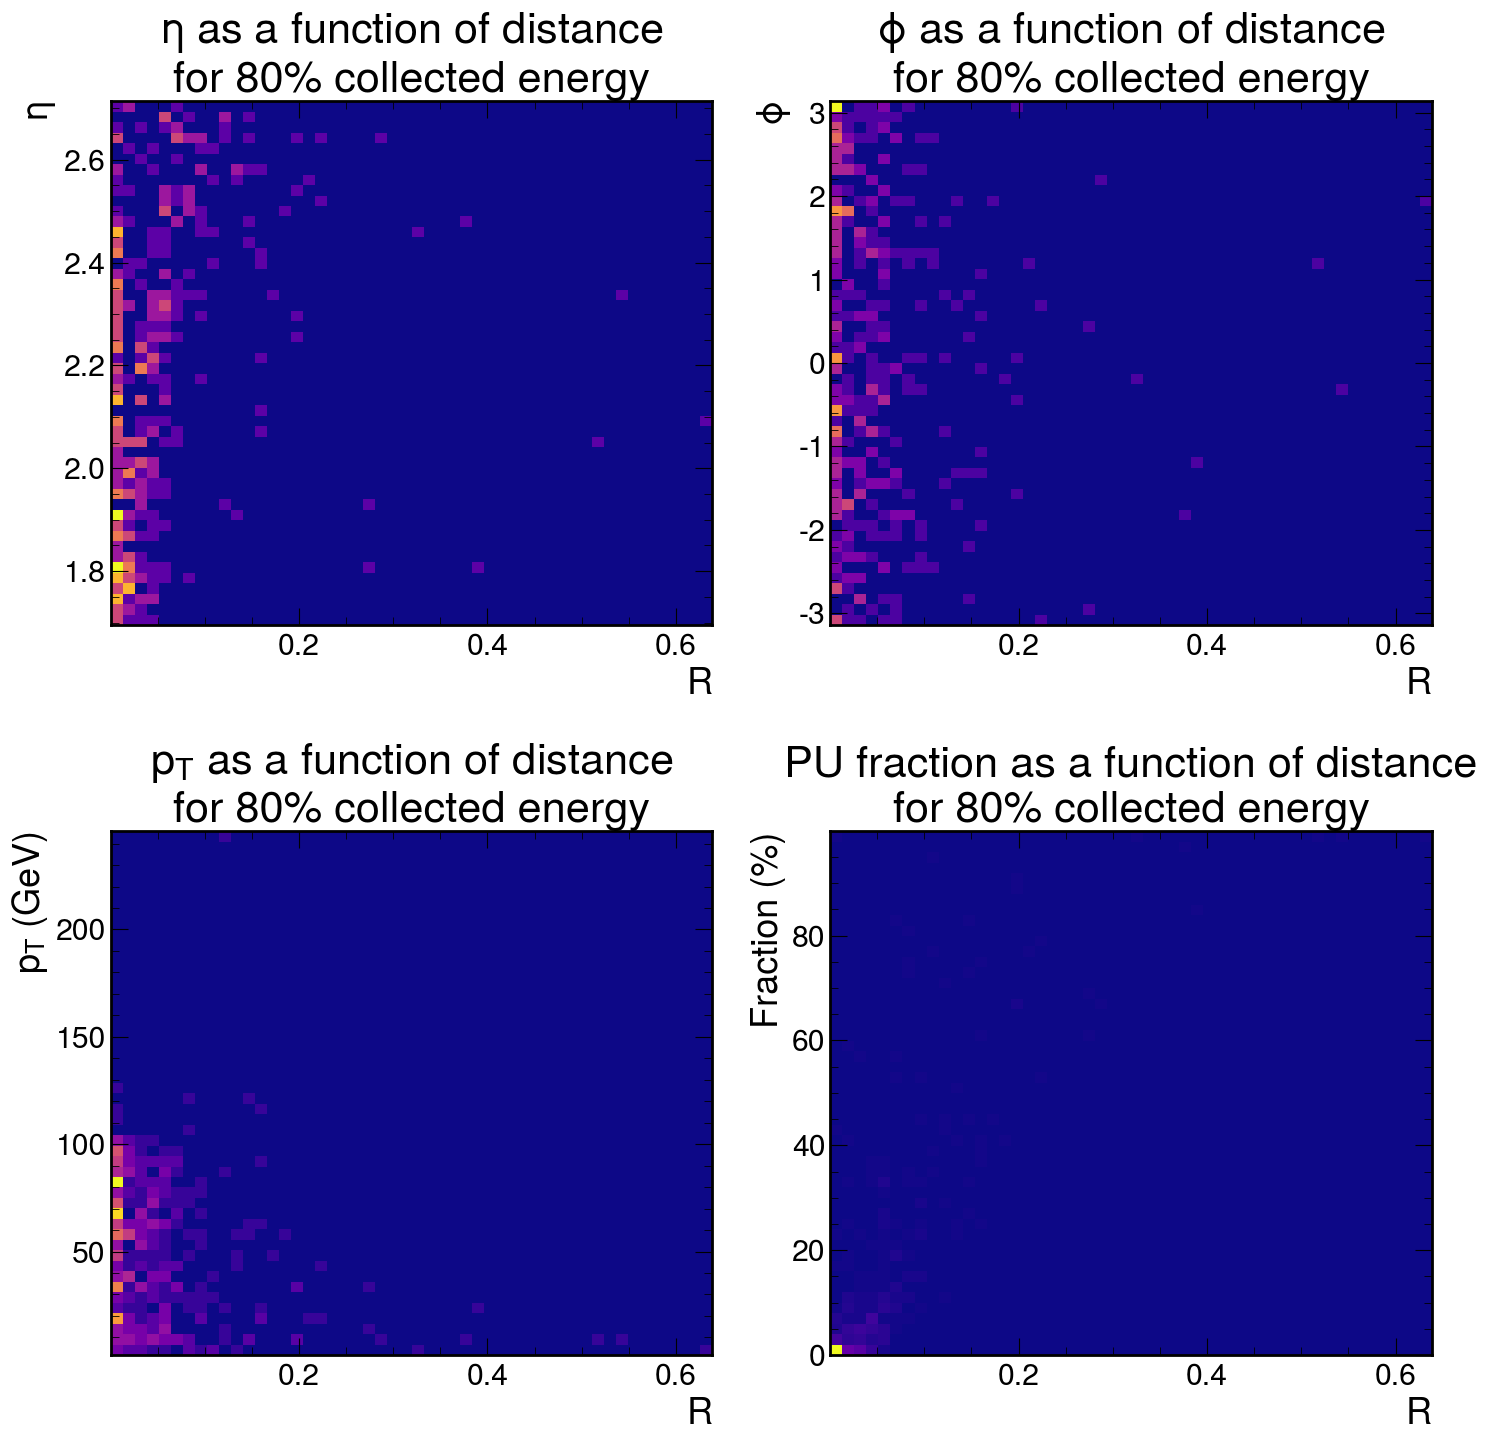

In [155]:
def hist2D_Ax(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.hist2d(ak.flatten(X), ak.flatten(Y),bins=10)#, s=ak.flatten(s), color='dodgerblue')
    except:
        plt.hist2d(X, Y,bins=50,cmap="plasma")#, s=s, color='dodgerblue')
    #plt.colorbar()
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    #plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
hist2D_Ax(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
hist2D_Ax(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
hist2D_Ax(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
hist2D_Ax(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# BDT

In [156]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

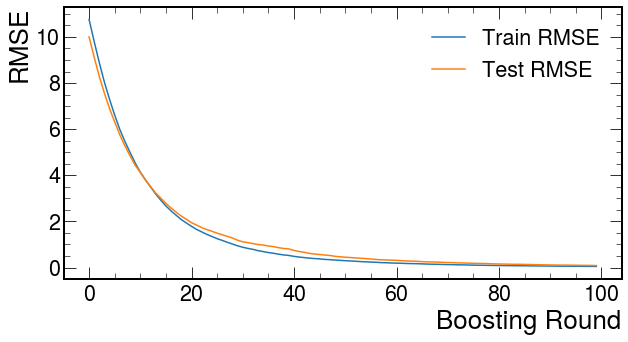

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         10.721400        0.169510       10.772203       0.662708
1          9.756400        0.138943        9.899872       0.639295
2          8.878780        0.138870        9.089707       0.556682
3          8.066033        0.120097        8.288808       0.498480
4          7.332951        0.097022        7.577920       0.488792
..              ...             ...             ...            ...
95         0.070840        0.006493        1.814153       0.310910
96         0.068720        0.006124        1.814285       0.310833
97         0.066552        0.006443        1.814363       0.310586
98         0.064908        0.005984        1.814189       0.310670
99         0.062291        0.005340        1.813975       0.310915

[100 rows x 4 columns]
Mean Squared Error: 0.012264020237878646


In [157]:
#array_ts_info = np.array(ts_info).T

data_dict = dict_info
#print(data_dict)
df = pd.DataFrame(data_dict)
df_features = df[['eta_trk','phi_trk','pt_trk',"etaErr","phiErr", "etaphiCov", "deltaR_trk"]]
df_label = df[['R', 'contamination']]
df_weights=df[["simEnergy"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(df_features, df_label, df_weights, test_size=0.1, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train, weight=w_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test, weight=w_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha' : 0,
    'lambda' : 1
}

# Train the model
evals_result = {}

xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100, evals=[(train_dmatrix, 'train'), (test_dmatrix, 'test')],
    evals_result=evals_result,  verbose_eval=False)
# Plot train vs test RMSE over time
plt.figure(figsize=(10, 5))
plt.plot(evals_result['train']['rmse'], label='Train RMSE')
plt.plot(evals_result['test']['rmse'], label='Test RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Perform cross-validation
cv_results = xgb.cv(
    params, 
    train_dmatrix, 
    num_boost_round=100, 
    nfold=5,  # Number of folds
    metrics="rmse",  # Metric to monitor, e.g., RMSE for regression
    early_stopping_rounds=10,  # Stops if there's no improvement
    as_pandas=True,
    seed=42
)

# Print the results of cross-validation
print(cv_results)




# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)
y_pred_train = xg_reg.predict(train_dmatrix)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [158]:
X_test, y_test

(       eta_trk   phi_trk      pt_trk    etaErr    phiErr     etaphiCov  \
 783   2.667636  1.326537   21.191643  0.000145  0.000094  2.340307e-10   
 898   2.536294 -1.807926   31.733541  0.000173  0.000089  1.041950e-09   
 413   2.079923 -1.171387  127.808220  0.000132  0.000202 -2.463342e-09   
 467   2.706526 -2.327132   70.810669  0.000075  0.000098 -1.229617e-10   
 745   1.877489 -2.843064  100.265739  0.000138  0.000037 -2.823830e-10   
 ...        ...       ...         ...       ...       ...           ...   
 363   2.358072  2.701777   82.324905  0.000113  0.000066  1.693709e-10   
 1012  2.330042  1.549686    6.716900  0.000612  0.000164  2.159246e-08   
 570   1.696394 -2.083214   71.194435  0.000198  0.000042  4.082471e-12   
 670   2.650151  2.670280   31.193821  0.000142  0.000089  1.994546e-09   
 1001  1.946489  0.314837   15.302472  0.000428  0.000186  9.767047e-10   
 
       deltaR_trk  
 783     0.000173  
 898     0.000195  
 413     0.000241  
 467     0.000124 

In [159]:
y_test, y_pred

(             R  contamination
 783   0.063534      37.179182
 898   0.065975      19.448610
 413   0.000623       0.000000
 467   0.017230      17.426811
 745   0.033772       1.515778
 ...        ...            ...
 363   0.005331       0.000000
 1012  0.039307      35.313864
 570   0.042789       6.791603
 670   0.073758      18.919580
 1001  0.003275       0.000000
 
 [114 rows x 2 columns],
 array([[6.65639713e-02, 3.71009598e+01],
        [6.63296580e-02, 1.94130878e+01],
        [1.80440687e-03, 2.69552395e-02],
        [1.76715385e-02, 1.74434395e+01],
        [3.30472626e-02, 1.49529612e+00],
        [1.19569138e-01, 1.15952606e+01],
        [2.59369835e-02, 5.86528625e+01],
        [6.03611283e-02, 3.16635919e+00],
        [1.87023345e-03, 1.17307212e-02],
        [2.05211416e-02, 1.11491299e+01],
        [4.18167152e-02, 6.48062289e-01],
        [5.86986262e-03, 1.72240704e-01],
        [8.48324876e-03, 2.11999798e+00],
        [3.02038472e-02, 5.92248726e+00],
        [1.90

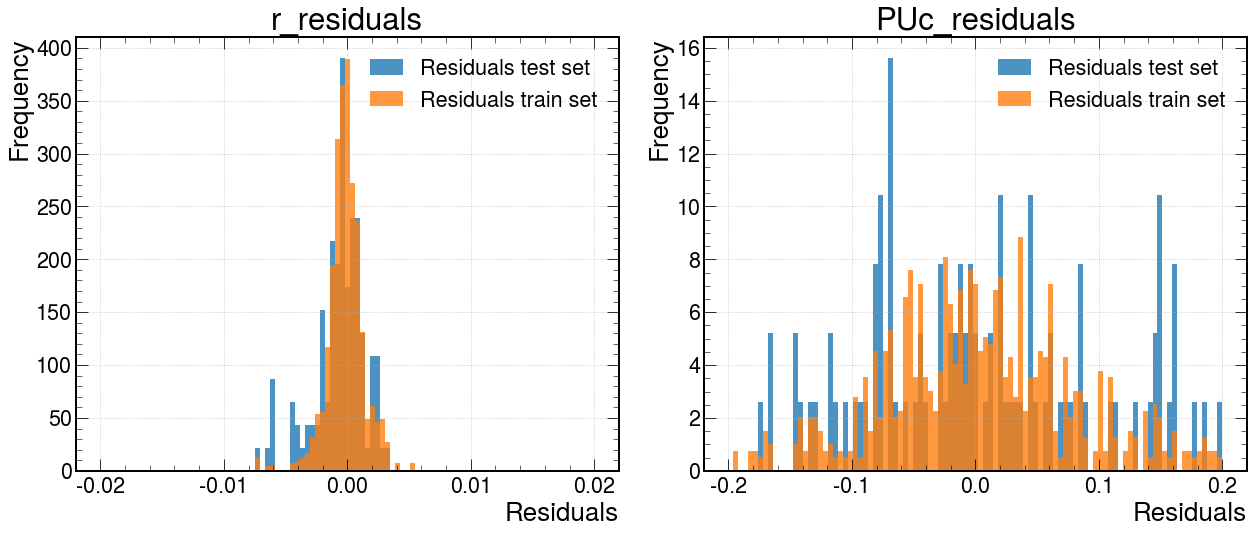

In [160]:
# Assuming y_test is a DataFrame or a numpy array with two columns (r and PUc)
# y_pred is the predicted output from the model


residuals_train=np.array(y_train)-y_pred_train


# Convert y_test to a numpy array (if it's a DataFrame)
y_test_array = np.array(y_test)

# Compute residuals
residuals = y_test_array - y_pred



# Convert residuals to a DataFrame for easy handling
residuals_df = pd.DataFrame(residuals, columns=['r_residuals', 'PUc_residuals'])
residuals_train_df=pd.DataFrame(residuals_train, columns=['r_residuals', 'PUc_residuals'])
# Calculate mean and standard deviation for both r_residuals and PUc_residuals
r_mean = residuals_df['r_residuals'].mean()
r_std = residuals_df['r_residuals'].std()

PUc_mean = residuals_df['PUc_residuals'].mean()
PUc_std = residuals_df['PUc_residuals'].std()

# Plot the residuals
fig, axs = plt.subplots(1, 2, figsize=(18,8))

bins = np.linspace(-0.02, 0.02, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['r_residuals'].hist(bins=bins, ax=axs[0], density=True, alpha=0.8, label='Residuals train set')

axs[0].set_title(f'r_residuals')
axs[0].legend()
#axs[0].text(0.1, 100, f'Mean: {r_mean:.5f}\nStd: {r_std:.5f}')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

min_value = min(residuals_df['PUc_residuals'].min(), residuals_train_df['PUc_residuals'].min())
max_value = max(residuals_df['PUc_residuals'].max(), residuals_train_df['PUc_residuals'].max())

bins = np.linspace(-0.2, 0.2, 100)  # bins=30 implica 31 bin edges
# Step 3: Crea gli istogrammi con lo stesso binning
residuals_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals test set')
residuals_train_df['PUc_residuals'].hist(bins=bins, ax=axs[1], density=True, alpha=0.8, label='Residuals train set')

# Aggiungi legende per distinguere i due dataset
axs[1].legend()

axs[1].set_title(f'PUc_residuals')
#axs[1].text(0.05, 100, f'Mean: {PUc_mean:.5f}\nStd: {PUc_std:.5f}')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [161]:
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

Number of trees in the model: 100


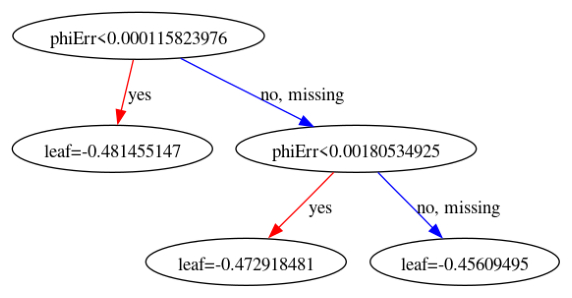

In [162]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

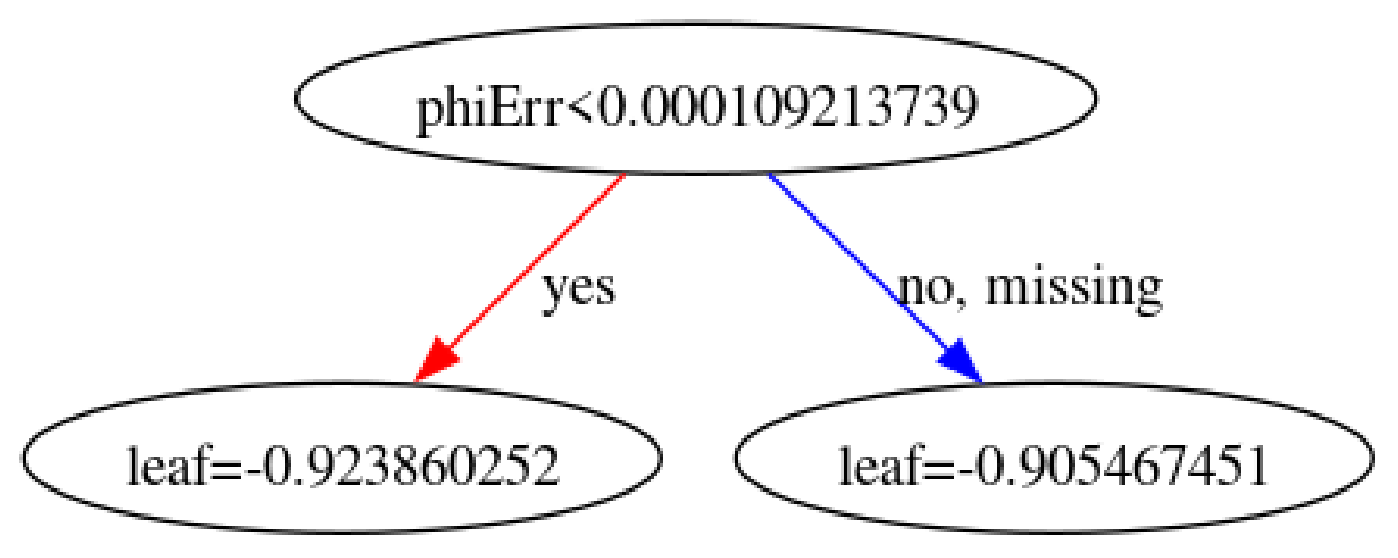

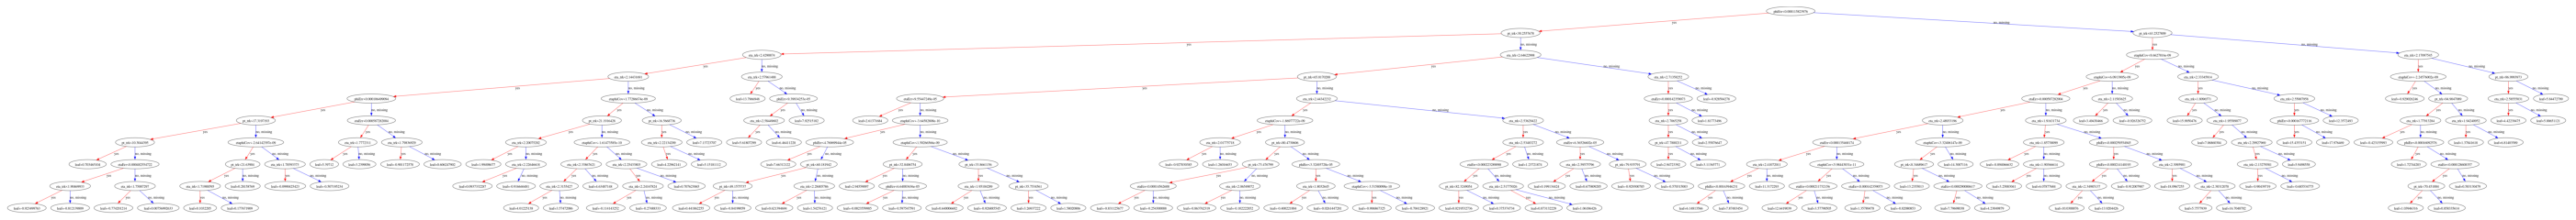

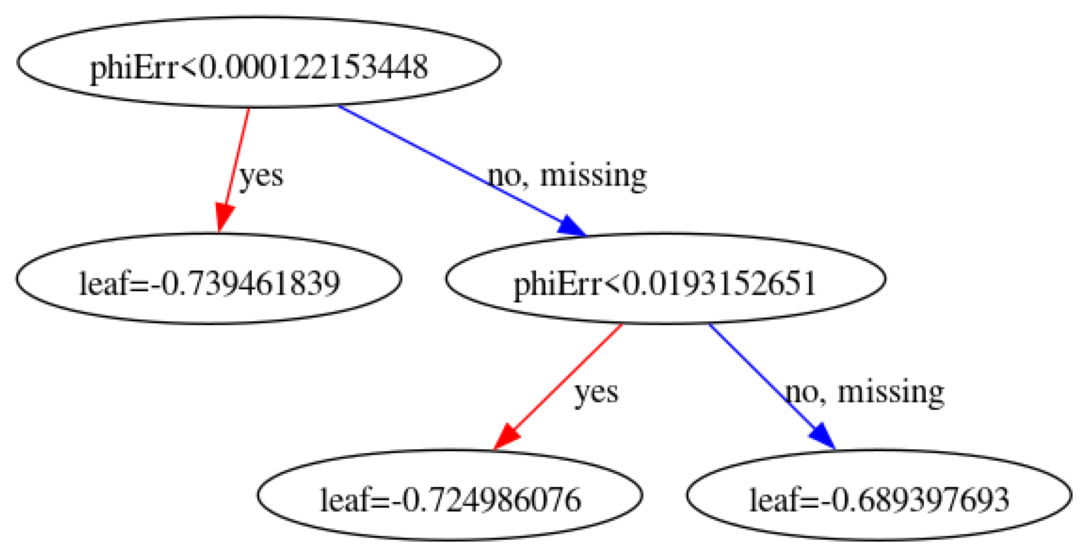

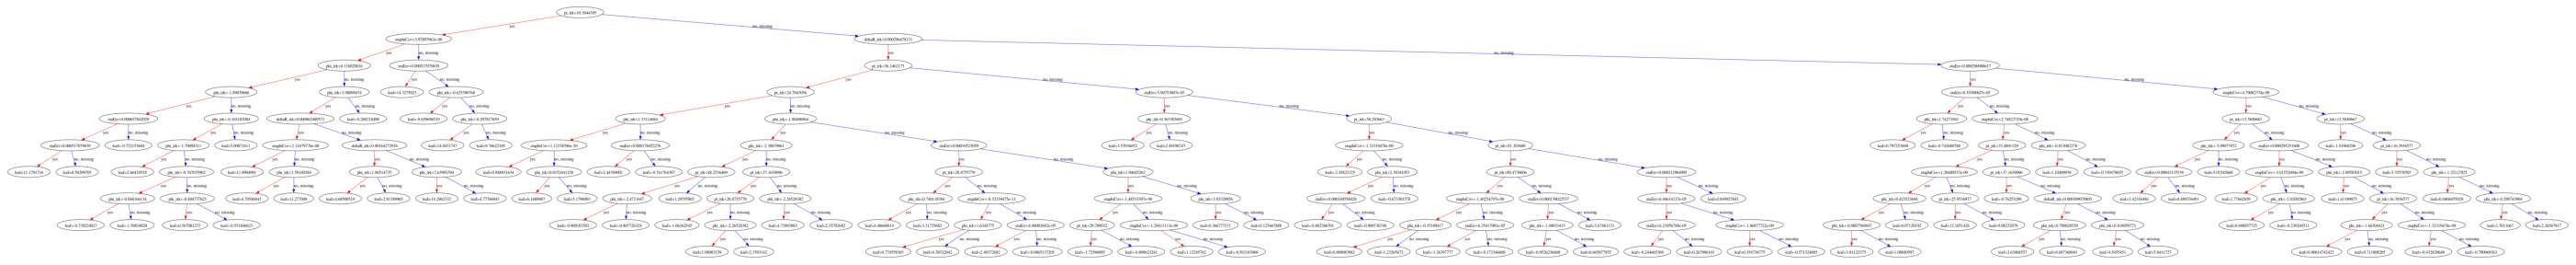

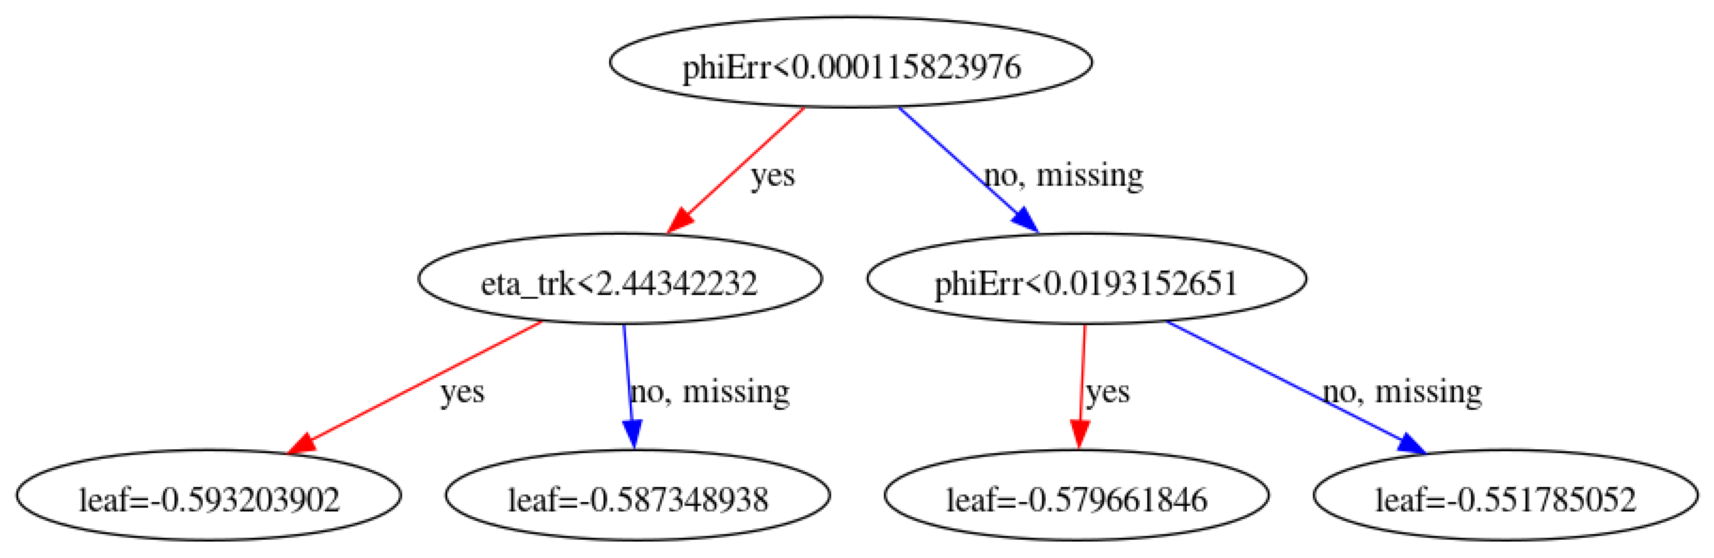

In [135]:
for i in range(5):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_reg = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    #'learning_rate': [0.01, 0.05, 0.1],
    'eta': [0.02, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE: {-grid_search.best_score_}")

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Calculate MSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


In [ ]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
}

params.update(grid_search.best_params_)
print(params)

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
"""
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'z': [360,300],         # Example values for new data
    'eta': [1.7, 2.3],
    'phi': [0.3, 0.4],
    'energy': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")
"""
# Get the number of trees in the model
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

In [ ]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

In [ ]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [ ]:
# # save to JSON
xg_reg.save_model("model230files.json")

# model_xgb_2 = xgb.Booster()
# model_xgb_2.load_model("model.json")

In [ ]:
# Get feature importance as a dictionary
feature_importance = xg_reg.get_score(importance_type='weight')
print("Feature Importance (by frequency):", feature_importance)


import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance (default: based on weight, i.e., frequency)
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

# # You can also plot feature importance based on 'gain' or 'cover':
# # Gain: the improvement in accuracy brought by a feature to the branches it is on
# ax = xgb.plot_importance(xg_reg, importance_type='gain')
# plt.show()

# Cover: the relative number of observations affected by a feature
xgb.plot_importance(xg_reg, importance_type='cover')
plt.show()

import pandas as pd

# Get feature importance by gain
importance_dict = xg_reg.get_score(importance_type='gain')

# Convert to a pandas DataFrame for better visualization and analysis
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)


In [ ]:
!pip install shap

In [ ]:
import sys
sys.path.append('/eos/home-t/tipaulet/.local/lib/python3.9/site-packages')
import shap

print(X_test.corr())

In [ ]:
# Create an explainer using your trained model
explainer = shap.TreeExplainer(xg_reg)

# Compute SHAP values for your test data
shap_values = explainer.shap_values(X_test)

In [ ]:
# Assuming two outputs, you can extract SHAP values for each
shap_values_r = shap_values[:, :, 0]  # SHAP values for the first output 'r'
shap_values_puc = shap_values[:, :, 1]  # SHAP values for the second output 'PUc'

# Convert SHAP values for 'r' to a DataFrame
shap_values_r_df = pd.DataFrame(shap_values_r, columns=X_test.columns)
print(shap_values_r_df.describe())

# Convert SHAP values for 'PUc' to a DataFrame (optional, if you want to analyze PUc separately)
shap_values_puc_df = pd.DataFrame(shap_values_puc, columns=X_test.columns)
print(shap_values_puc_df.describe())

In [ ]:
# Plot SHAP summary for 'r'
shap.summary_plot(shap_values_r, X_test, plot_size=(10,6)) # , max_display=X_test.shape[1] is for the max number of variables to be displayed (default is 20)

In [ ]:
# Plot SHAP summary for 'PUc'
shap.summary_plot(shap_values_puc, X_test, plot_size=(10,6)) 